In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/workspaces/pymaceuticals-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/workspaces/pymaceuticals-challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

study_complete = pd.merge(study_results, mouse_metadata, how = 'left')

# Display the data table for preview
display(study_complete)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#Check the number of mice
num_mice = study_complete['Mouse ID'].nunique()
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = study_complete[study_complete.duplicated(keep = False)]
print(duplicates)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107     g989          0                45.0                 0     Propriva   
137     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
107  Female          21          26  
137  Female          21          26  


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_complete = study_complete[study_complete['Mouse ID'] != 'g989']

In [5]:
# Check the number of mice again
num_mice_clean = study_complete['Mouse ID'].nunique()
print(num_mice_clean)

248


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_variance = study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stdev = study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_stderr = study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_stats_summary = pd.DataFrame({
'Mean Tumor Volume': mean_tumor_volume, 
'Median Tumor Volume': median_tumor_volume, 
'Tumor Volume Variance': tumor_vol_variance,
'Tumor Volume Std. Dev': tumor_vol_stdev,
'Tumor Volume Std. Err': tumor_vol_stderr
})

display(tumor_stats_summary)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

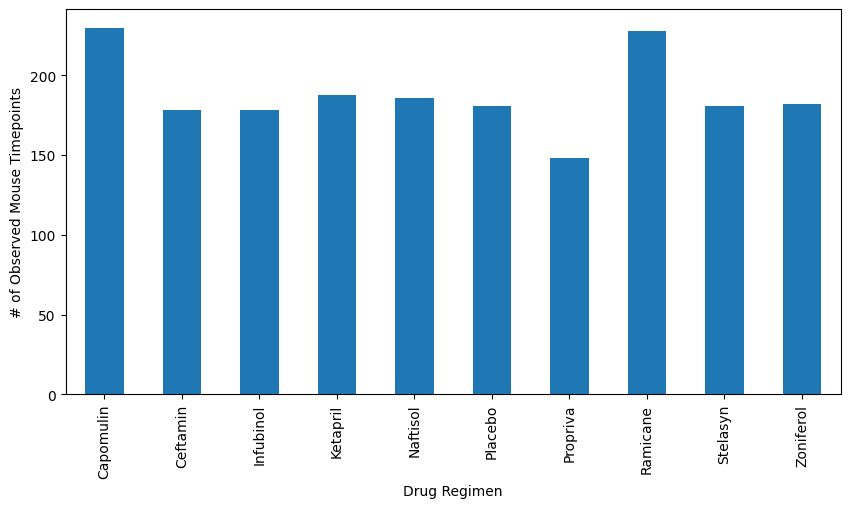

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

study_complete.groupby('Drug Regimen').size().plot.bar(x = 'Drug Regimen', y = 'Number of Timepoints', ylabel = '# of Observed Mouse Timepoints', figsize=(10, 5))

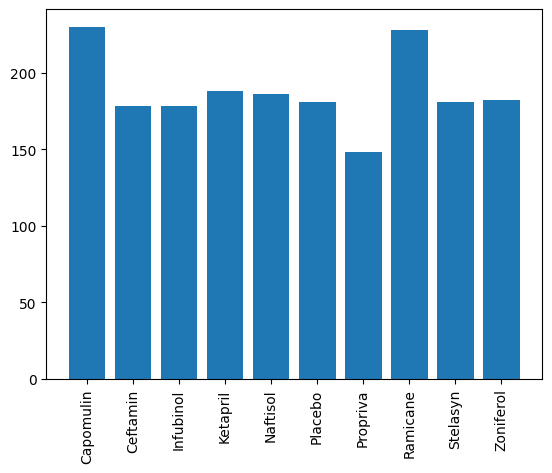

In [8]:
#get the counts
drug_regimen_counts = study_complete.groupby('Drug Regimen')['Timepoint'].count()

# Create the bar chart
bar_chart = plt.bar(drug_regimen_counts.index, drug_regimen_counts.values,align='center')

#Make it aesthetically pleasing
bar_chart.xlabel = 'Drug Regimen'
bar_chart.ylabel = '# of Observed Mouse Timepoints'
plt.xticks(rotation = 90)

plt.show()


<Axes: ylabel='Mouse ID'>

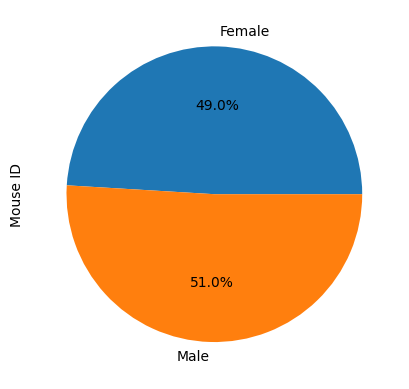

In [9]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender = study_complete.groupby('Sex')['Mouse ID'].count()

# Make the pie chart
mouse_gender.plot(kind = 'pie', y = 'count', autopct = '%0.001f%%')

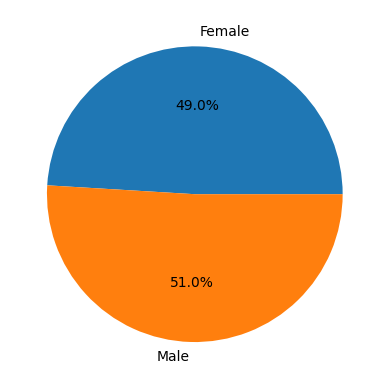

In [10]:
#Pie chart using matplotlib

#get mouse gender counts
mouse_gender = study_complete.groupby('Sex')['Mouse ID'].count()

#create pie chart
mpl_pie = plt.pie(mouse_gender, labels = ['Female', 'Male'], autopct = '%0.001f%%' )

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

med_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
narrowed_med_df = study_complete[study_complete['Drug Regimen'].isin(med_list)]

# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = study_complete.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(max_timepoints, narrowed_med_df, how = 'left')

display(last_timepoint_df)

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,n364,31.095335,1,Ramicane,Male,4,17
1,45,b128,38.982878,2,Capomulin,Female,9,22
2,45,l661,59.851956,3,Ceftamin,Male,18,26
3,45,y865,64.729837,3,Ceftamin,Male,23,26
4,45,y769,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
18082,45,a644,32.978522,1,Ramicane,Female,7,17
18083,45,i177,33.562402,3,Ramicane,Male,10,18
18084,45,r944,41.581521,2,Capomulin,Male,12,25
18085,45,u364,31.023923,3,Capomulin,Male,18,17


In [12]:

 tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in med_list:

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
# add subset to the list
    tumor_vol_data.append(treatment_data)
    
# Calculate the IQR
    treatment_Q1 = last_timepoint_df['Tumor Volume (mm3)'].quantile(0.25)
    treatment_Q3 = last_timepoint_df['Tumor Volume (mm3)'].quantile(0.75)
    treatment_IQR = treatment_Q3 - treatment_Q1
    
# Determine the outlier bounds
    lower_bound = treatment_Q1 - (1.5 * treatment_IQR)
    upper_bound = treatment_Q3 + (1.5 * treatment_IQR)
    
# Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
# Print results
    print(f"{treatment}'s potential outliers: {outliers}")


#summarize this in a dataframe first
treatment_data_df = pd.DataFrame({

'Capomulin' : tumor_vol_data[0],
'Ramicane': tumor_vol_data[1],
'Infubinol': tumor_vol_data[2],
'Ceftamin': tumor_vol_data[3]
})

display(treatment_data_df)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,31.095335,NaN,NaN
1,38.982878,NaN,NaN,NaN
2,NaN,NaN,NaN,59.851956
3,NaN,NaN,NaN,64.729837
4,NaN,NaN,NaN,68.594745
...,...,...,...,...
18082,NaN,32.978522,NaN,NaN
18083,NaN,33.562402,NaN,NaN
18084,41.581521,NaN,NaN,NaN
18085,31.023923,NaN,NaN,NaN


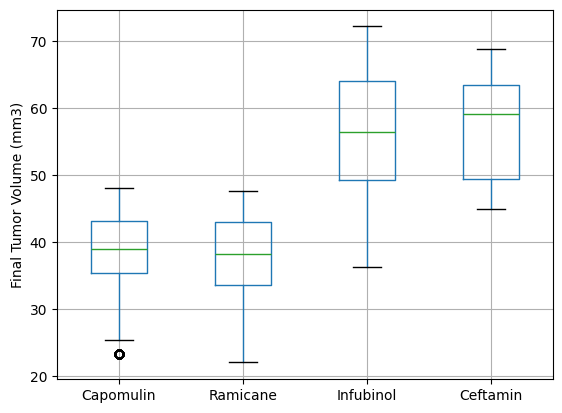

In [13]:
#Create a box plot with the above treatment data
boxplot = treatment_data_df.boxplot()

boxplot.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

<Axes: xlabel='Timepoint'>

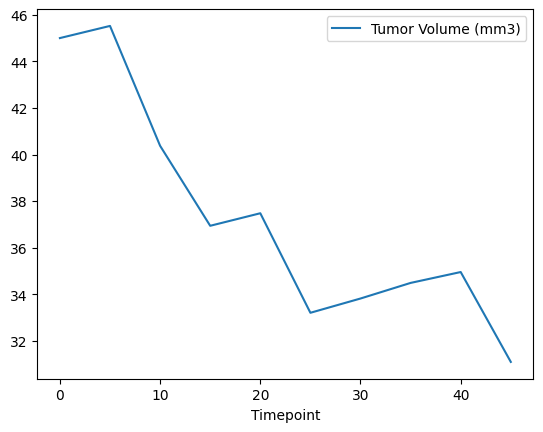

In [14]:
#Line plot for a single mouse on Capomulin

#Filter for a single mouse
single_mouse = study_complete[study_complete['Mouse ID'] == 'n364']

single_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)')

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

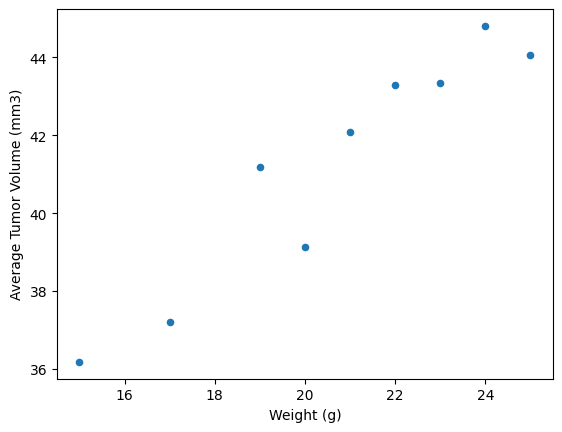

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_only = study_complete[study_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse weight
cap_avg_tumor_volume = capomulin_only.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Rename the columns for clarity
cap_avg_tumor_volume.columns = ['Weight (g)', 'Average Tumor Volume (mm3)']

cap_avg_tumor_volume.plot.scatter(x = 'Weight (g)', y = 'Average Tumor Volume (mm3)')


The correlation between mouse weight and the average tumor volume is 0.95


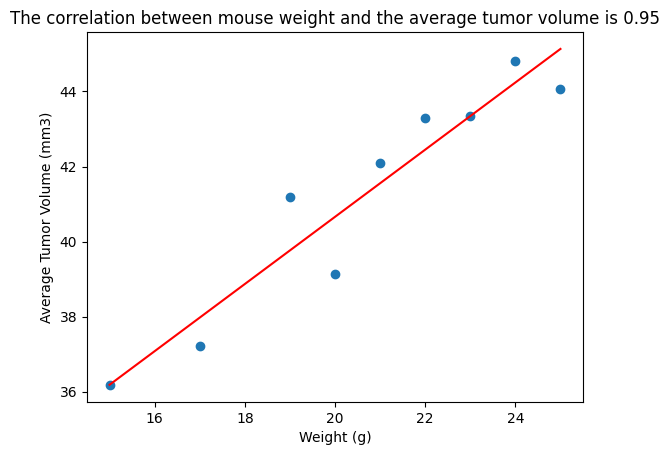

In [16]:
#Regression and Correlation

# Calculate the correlation coefficient
correlation = np.corrcoef(cap_avg_tumor_volume['Weight (g)'], cap_avg_tumor_volume['Average Tumor Volume (mm3)'])[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

#Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap_avg_tumor_volume['Weight (g)'], cap_avg_tumor_volume['Average Tumor Volume (mm3)'])

# Create regression line values
regress_values = cap_avg_tumor_volume['Weight (g)'] * slope + intercept

#Scatter plot of Mouse Weight vs. Average Tumor Volume
plt.scatter(cap_avg_tumor_volume['Weight (g)'], cap_avg_tumor_volume['Average Tumor Volume (mm3)'])


# Plot the regression line
plt.plot(cap_avg_tumor_volume['Weight (g)'], regress_values, color='red')

# Set title and labels
plt.title(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()
